<a href="https://colab.research.google.com/github/Bast-aleja/Marketing_1/blob/main/Modelos__Entrega_final_modulo_finanzas_Seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# El vector Target será valor_pago. Este dependerá del tipo de reclamación, cabe destacar que existen 39 tipos de reclamos, por ende,
# se crearan dataframes que  agrupen ciertas categorias. Esta agrupación se dará teniedo encuenta la cantidad de veces que se han registrado 
# las determinadas reclamaciones.
#DF1: CONSULTA EXTERNA - EXAMENES DE DIAGNOSTICO - LABORATORIO CLINICO - CONSULTA DE URGENCIAS
#DF2: CIRUGIA AMBULATORIA POR ENFERMEDAD - TRATAMIENTOS ESPECIFICOS - TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES - CONSULTAS PRENATALES 
#DF3: ANEXO EXEQUIAL - TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA - ANEXO EXEQUIAL
union_exp_prueba['reclamacion'].value_counts()

CONSULTA EXTERNA                                                   398070
EXAMENES DE DIAGNOSTICO                                            220175
LABORATORIO CLINICO                                                165185
CONSULTA DE URGENCIAS                                              116185
CIRUGIA AMBULATORIA POR ENFERMEDAD                                  33498
FISIOTERAPIA ILIMITADA                                              31101
TRATAMIENTOS ESPECIFICOS                                            15695
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                       12451
CONSULTAS PRENATALES                                                10714
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       8969
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   6457
CIRUGIA AMBULATORIA POR ACCIDENTE                                    5535
TRATAMIENTO AMBULATORIO POR CANCER                                   4749
PAMD                                  

Depuració Base de datos general grande

In [ ]:
#Verificación de datos nulos 
union_exp_prueba.isnull().sum()

reclamacion             0
cod_diagnostico         0
diagnostico_desc        0
eventos                 0
valor_pagado            0
sexo                    0
regional                0
cancer                781
epoc                  781
diabetes              781
hipertension          781
enf_cardiovascular    781
edad                  781
dtype: int64

 

---
debido a que todos tienen la misma cantidad de datos nulos y es un tipo de
dato dificil de reemplazar o predecir se decide eliminar estas filas que no representan gran porcentaje de la base


In [ ]:
union_exp_prueba = union_exp_prueba[union_exp_prueba['cancer'].notna()]


In [ ]:
union_exp_prueba

,reclamacion,cod_diagnostico,diagnostico_desc,eventos,valor_pagado,sexo,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad
id_cliente,,,,,,,,,,,,,
4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÍDOS Y DE LA AUDICIÓN,1,111600.0,1,1,0,0,0,1,0,48.173474
14915125,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,50468.0,0,1,0,0,0,0,0,35.770755
42959949,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,610452.0,0,1,0,0,0,0,0,30.081384
30540131,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,42160.0,0,1,0,0,0,0,0,38.267726
21442420,LABORATORIO CLINICO,9,DIAGNÓSTICO PENDIENTE,18,617336.48,0,1,0,0,0,0,0,27.587151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822689,LABORATORIO CLINICO,9,DIAGNÓSTICO PENDIENTE,2,173448.72,1,0,0,0,0,0,0,49.523262
4806249,CIRUGIA AMBULATORIA POR ENFERMEDAD,L732,HIDRADENITIS SUPURATIVA,1,496000.0,0,1,0,1,1,0,0,57.074409
10899044,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,24056.0,0,4,0,0,0,0,0,38.341650


CREAR DF's 

In [ ]:
#Crear DF1: CONSULTA EXTERNA - EXAMENES DE DIAGNOSTICO - LABORATORIO CLINICO - CONSULTA DE URGENCIAS
options_DF1 = ['CONSULTA EXTERNA', 'EXAMENES DE DIAGNOSTICO','LABORATORIO CLINICO','CONSULTA DE URGENCIAS'] 
DF1 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF1)]

In [ ]:
#Crear DF2: CIRUGIA AMBULATORIA POR ENFERMEDAD - TRATAMIENTOS ESPECIFICOS - TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES - CONSULTAS PRENATALES 
options_DF2 = ['CIRUGIA AMBULATORIA POR ENFERMEDAD', 'TRATAMIENTOS ESPECIFICOS','TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES','CONSULTAS PRENATALES'] 
DF2 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF2)]

In [ ]:
#Crear DF3: ANEXO EXEQUIAL - TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA - ANEXO EXEQUIAL- TRATAMIENTO HOSPITALARIO POR TRASPLANTES 
options_DF3 = ['ANEXO EXEQUIAL', 'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA','ANEXO EXEQUIALS','TRATAMIENTO HOSPITALARIO POR TRASPLANTES'] 
DF3 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF3)]

DEPURACIÓN DE LOS DF

Depuración DF2

In [ ]:
DF2.columns

Index(['reclamacion', 'cod_diagnostico', 'diagnostico_desc', 'eventos',
       'valor_pagado', 'sexo', 'regional', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular', 'edad'],
      dtype='object')

In [ ]:
#Eliminar vector target
DF2.drop(['valor_pagado', 'reclamacion', 'cod_diagnostico'], axis=1, inplace=True)

In [ ]:
DF2.isnull().sum()

diagnostico_desc      0
eventos               0
sexo                  0
regional              0
cancer                0
epoc                  0
diabetes              0
hipertension          0
enf_cardiovascular    0
edad                  0
dtype: int64

SELECCIÓN DEL MODELO

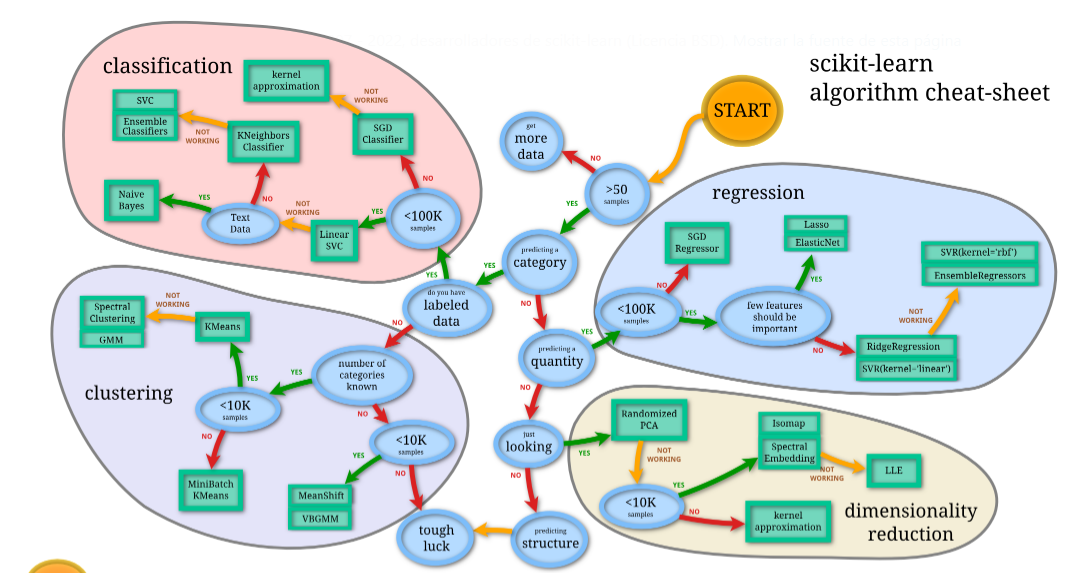

In [ ]:
DF2.shape #(SGD_regressor, arbol, regresión)

(72293, 10)

Selección de Features

In [ ]:
#Definición de variables para los modelos DF1
x_DF1 = DF1
y_Df1 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF1)]['valor_pagado']

In [ ]:
#Definición de variables para los modelos DF2
x_DF2 = DF2
y_Df2 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF2)]['valor_pagado'].to_frame()

In [ ]:
#Definición de variables para los modelos DF3
x_DF3 = DF3
y_Df3 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF3)]['valor_pagado']

Se decide probar una base de datos(df2)que no tenga tantos datos para saber el tiempo de ejecución del modelo y poder desarrollarlo para las otras bases

**BASE DE DATOS 2**

In [ ]:
import sklearn.linear_model as sl
import sklearn.feature_selection as sf

In [ ]:
x_DF2=x_DF2.drop(['diagnostico_desc'], axis=1)

In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF2,y_Df2)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [ True  True False  True False  True  True False False]
Rankig de features:  [1 1 2 1 4 1 1 3 5]


In [ ]:
#Feature Importance
X = x_DF2[:2000]
Y = y_Df2[:2000].astype(int)
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,Y)
print(modelo.feature_importances_)
importances = modelo.feature_importances_ 

idx = np.arange(0, X.shape[1]) 
features_to_keep = idx[importances > np.mean(importances)] 


x_feature_selected = X.iloc[:,features_to_keep]
print(features_to_keep.shape)
print(list(x_feature_selected))
data_tuples = list(zip(X.columns,importances))
importance_df = pd.DataFrame(data_tuples, columns=['Columns','Importances'])
importance_df

[0.02314307 0.00862223 0.04303323 0.01191203 0.00697437 0.0075702
 0.00839924 0.00573488 0.88461075]
(1,)
['edad']


,Columns,Importances
0,eventos,0.023143
1,sexo,0.008622
2,regional,0.043033
3,cancer,0.011912
4,epoc,0.006974
5,diabetes,0.007570
6,hipertension,0.008399
7,enf_cardiovascular,0.005735
8,edad,0.884611


**LOS FEATURES SELECCIONADOS SON**



1.   Eventos
2.   Sexo
3.   Diabetes
4.   Hipertención
5.   Cancer



In [ ]:
x_DF21 = x_DF2.drop(['regional','epoc', 'enf_cardiovascular',	'edad'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF21,y_Df2,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.013507208642833057

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF21,y_Df2,cv=kfold)

test.mean()

0.013474980528845392

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF21,y_Df2,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF21,y_Df2,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  1053645.6283994624
R2:  0.013474980528845392


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF2,y_Df2)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF2,y_Df2))

Intercept: [581986.10258276]
R^2: 0.02009210839824882


**RED NEURONAL**

In [ ]:
#Seleccion Features
#Recursive Feature Elimination
import sklearn.linear_model as sl
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(random_state=1, max_iter=500).fit(x_DF2,y_Df2)
rfe = sf.RFE(modelo, n_features_to_select=5)


print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [False  True  True  True False False  True False  True]
Rankig de features:  [5 1 1 1 4 2 1 3 1]


In [ ]:
#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF2,y_Df2,test_size=p, random_state=semilla)

#Crear modelo

model = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=500)

#Entrenamiento de modelo
model.fit(Xentrena, Yentrena)

#Pruebas del modelo

model.score(Xprueba, Yprueba)


In [ ]:
#Kfold validation
model2 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x_DF2,y_Df2,cv=kfold)

print('K-fold:', test.mean())

#Repeated Random Test-Train Splits
kfold = skm.ShuffleSplit(n_splits=10, test_size=p, random_state=semilla)
model4 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
test = skm.cross_val_score(model4, x_DF2,y_Df2,cv=kfold)

print('Test-Train Splits:', test.mean())

#Metricas de precision

# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model5,x_DF2,y_Df2,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)

# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model6,x_DF2,y_Df2,cv=kfold,scoring=score)
print("R2: ",resultado.mean()*100*-1)

Debido al tiempo que toma de ejecución las redes neuronales por la cantidad de datos de las bases, se decide hacer las otras dos bases por medio de la regresion lineal unicamente

**BASE DE DATOS 1**

In [ ]:
x_DF1

In [ ]:
x_DF1=x_DF1.drop(['reclamacion',	'cod_diagnostico',	'diagnostico_desc', 'valor_pagado' ], axis=1)

In [ ]:
x_DF1

,eventos,sexo,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad
id_cliente,,,,,,,,,
4834968,1,1,1,0,0,0,1,0,48.173474
14915125,1,0,1,0,0,0,0,0,35.770755
42959949,1,0,1,0,0,0,0,0,30.081384
30540131,1,0,1,0,0,0,0,0,38.267726
21442420,18,0,1,0,0,0,0,0,27.587151
...,...,...,...,...,...,...,...,...,...
6052845,1,0,1,0,0,0,0,0,61.329117
41660293,1,0,0,0,0,0,0,0,27.822611
9822689,2,1,0,0,0,0,0,0,49.523262


In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF1,y_Df1)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [ True False False  True  True  True  True False False]
Rankig de features:  [1 5 3 1 1 1 1 2 4]


**LOS FEATURES SELECCIONADOS SON**



1.   Eventos
2.   Cancer
3.   Diabetes
4.   Hipertención
5.   Epoc


In [ ]:
x_DF11 = x_DF1.drop(['sexo',	'regional',	 'enf_cardiovascular',	'edad'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF11,y_Df1,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.05114641914658513

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF11,y_Df1,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.05114641914658513

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF11,y_Df1,cv=kfold)

test.mean()

0.05141596104941524

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF11,y_Df1,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF11,y_Df1,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  148310.20833771495
R2:  0.05141596104941524


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF11,y_Df1)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF11,y_Df1))

Intercept: 139272.97626297004
R^2: 0.05137604948368202


**BASE DE DATOS 3**

In [ ]:
x_DF3

In [ ]:
x_DF3=x_DF3.drop(['reclamacion',	'cod_diagnostico',	'diagnostico_desc', 'valor_pagado' ], axis=1)

In [ ]:
x_DF3

In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF3,y_Df3)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [False  True  True  True False False  True False  True]
Rankig de features:  [5 1 1 1 4 2 1 3 1]


**LOS FEATURES SELECCIONADOS SON**



1.   Sexo
2.   Regional
3.   Cancer
4.   Hipertención
5.   Edad

In [ ]:
x_DF31 = x_DF3.drop(['eventos',	'epoc',	'diabetes',	'enf_cardiovascular'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF31,y_Df3,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

-89.2842986781666

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF31,y_Df3,cv=kfold)

test.mean()

nan

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF31,y_Df3,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF31,y_Df3,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  54032416.58825705
R2:  nan


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF31,y_Df3)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF31,y_Df3))

Intercept: 49349496.993404135
R^2: 0.11596979459166334
